# Web Scraping

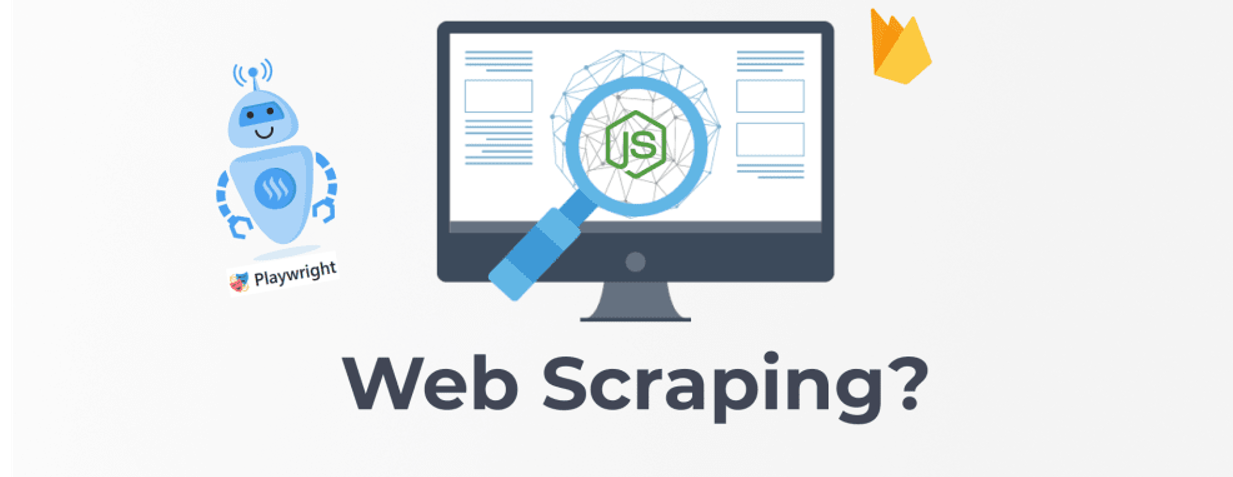

Web scraping é o processo de coleta de dados estruturados da web de maneira automatizada. Também é chamado de extração de dados da web. Alguns dos principais casos de uso do web scraping incluem monitoramento de preços, inteligência de preços, monitoramento de notícias, geração de leads e pesquisa de mercado, entre muitos outros.

Em geral, a extração de dados da web é usada por pessoas e empresas que desejam usar a vasta quantidade de dados da web disponíveis publicamente para tomar decisões mais inteligentes.

# Capturando o índice da ibovespa 




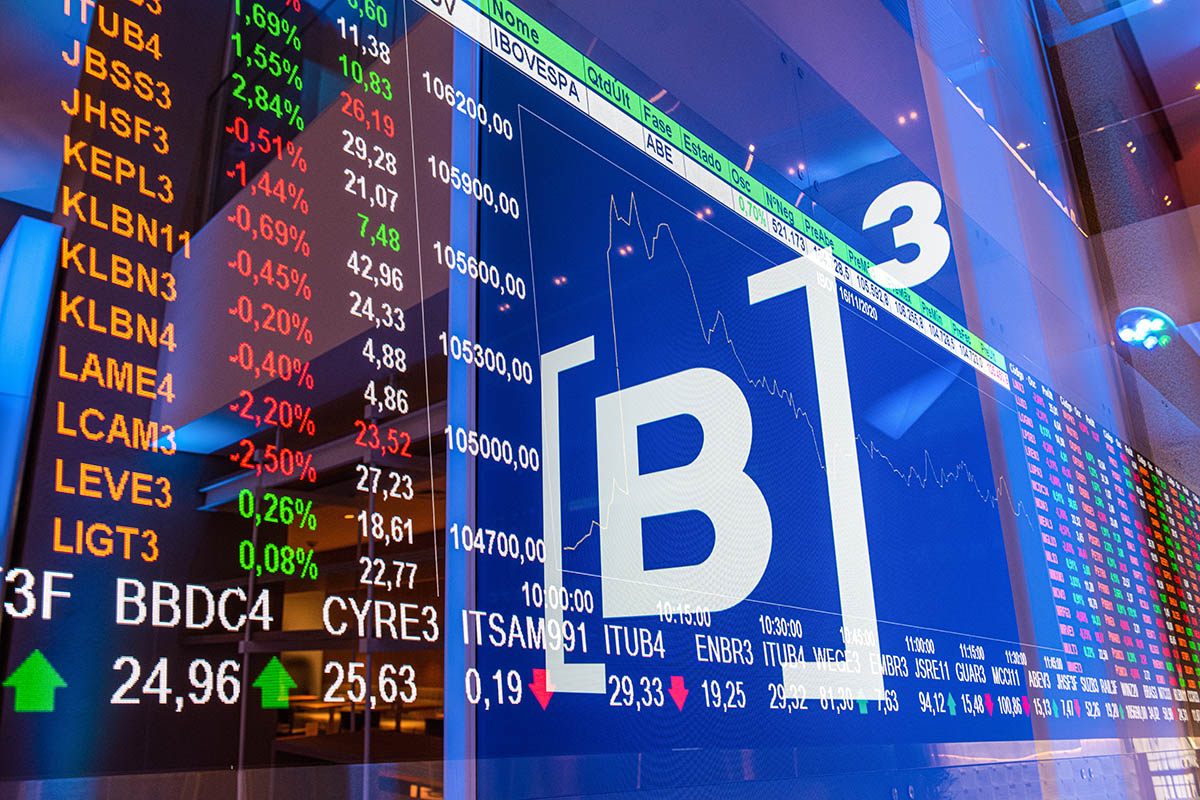

O Ibovespa é o principal índice da Bolsa de Valores brasileira. Basicamente, ele mede o desempenho das ações mais líquidas listadas. Portanto, esse indicador pode ser utilizado como benchmark para os investimentos em renda variável.


**Qual a importância do índice Bovespa?**

O Índice Bovespa, o Ibovespa, é um dos índices mais importantes da economia brasileira. Ele é uma espécie de termômetro que tenta medir o desempenho médio das ações no mercado de ações. Ele tenta representar, de forma fiel e eficiente, o comportamento médio do mercado de ações.


Nesse contexto, muitas empresas/investidores analisam esse índíce cruzando com seus dados internos para tomar decisões acerca de seus investimentos. Embora conseguir esses dados seja uma tarefa fácil, quando precisamos ter esses dados com uma grande frequência, acaba tomando bastante tempo, sendo aí que entra o web scraping, pois é possível automatizar a busca por esses dados via programação, e é isso que iremos fazer agora!

## Importação das bibliotecas

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import pandas as pd 
from time import sleep 
from datetime import date
from calendar import monthrange
from dateutil.relativedelta import relativedelta


## Configurando o range de data para o mês anterior

In [ ]:
#Coletando a data min e máxima do mês anterior
data_atual = date.today()
data_atual = data_atual - relativedelta(months=1)
ult_dia_mes = monthrange(data_atual.year,data_atual.month)[1]
data_inicial = date(data_atual.year , data_atual.month , 1)
data_final = date(data_atual.year , data_atual.month , ult_dia_mes) 
data_inicial = data_inicial.strftime("%d/%m/%y")
data_final = data_final.strftime("%d/%m/%y")

In [9]:
# Capturando a data atual
data_atual = date.today()

In [10]:
# Voltando a data para o mês anterior
data_mes_anterior = data_atual - relativedelta(months=1)

In [14]:
#Ultimo dia do mês
ult_dia_mes = monthrange(data_mes_anterior.year, data_mes_anterior.month)[1]

In [16]:
#Data inicial 
data_inicial = date(data_mes_anterior.year , data_mes_anterior.month , 1)

In [17]:
#Data final 
data_final = date(data_mes_anterior.year  , data_mes_anterior.month , ult_dia_mes) 

In [18]:
#Transformando do formato datetime para string 
data_inicial = data_inicial.strftime("%d/%m/%y")
data_final = data_final.strftime("%d/%m/%y")

## Configurando o selenium

In [43]:
#Cofigurando o drive do selenium para que ele não abra o navegador
options = Options()
options.add_argument("--headless")
navegador  = webdriver.Chrome( options = options)

## Acessando o site com selenium

In [44]:
#Acessando o link
navegador.get('https://br.advfn.com/bolsa-de-valores/bovespa/indice-bovespa-IBOV/historico/mais-dados-historicos') 

In [45]:
navegador.find_element(By.XPATH, '//*[@id="Date1"]').clear() #Limpando o formulário de acesso 
navegador.find_element(By.XPATH, '//*[@id="Date1"]').send_keys(data_inicial) # Inserindo a data inicial 

navegador.find_element(By.XPATH,'//*[@id="Date2"]').clear() #Limpando o formulário de acesso 
navegador.find_element(By.XPATH,'//*[@id="Date2"]').send_keys(data_final) # Inserindo a data inicial 

navegador.find_element(By.XPATH,'//*[@id="submit-btn"]').click() # Clicando (pesquisando os dados pra data selcionada)


In [46]:
# Salvando o resultado no data frame 
df = pd.read_html(navegador.find_element(By.XPATH,'//*[@id="content"]/div[2]').get_attribute('outerHTML'))[0] 

In [47]:
df.head()

,Data,Fechamento,Variação,Variação (%),Abertura,Máxima,Mínima,Volume
0,30 Nov 2021,"101.915,45",-89858,"-0,87%","102.814,03","103.066,44","100.074,61",1.218.794.100
1,29 Nov 2021,"102.814,03",58977,"0,58%","102.226,78","104.148,72","102.226,04",617.910.500
2,26 Nov 2021,"102.224,26","-3.586,99","-3,39%","105.810,14","105.810,14","101.494,70",695.152.900
3,25 Nov 2021,"105.811,25","1.297,06","1,24%","104.514,19","106.400,41","104.514,19",514.380.200
4,24 Nov 2021,"104.514,19",86037,"0,83%","103.651,88","105.041,16","102.464,29",660.678.400


In [48]:
# Transformando a coluna 'Data' no formato datetime
df['Data'] = pd.to_datetime( df['Data'] )

In [50]:
df

,Data,Fechamento,Variação,Variação (%),Abertura,Máxima,Mínima,Volume
0,2021-11-30,"101.915,45",-89858,"-0,87%","102.814,03","103.066,44","100.074,61",1.218.794.100
1,2021-11-29,"102.814,03",58977,"0,58%","102.226,78","104.148,72","102.226,04",617.910.500
2,2021-11-26,"102.224,26","-3.586,99","-3,39%","105.810,14","105.810,14","101.494,70",695.152.900
3,2021-11-25,"105.811,25","1.297,06","1,24%","104.514,19","106.400,41","104.514,19",514.380.200
4,2021-11-24,"104.514,19",86037,"0,83%","103.651,88","105.041,16","102.464,29",660.678.400
5,2021-11-23,"103.653,82","1.081,21","1,05%","102.123,95","103.841,23","101.736,31",761.938.300
6,2021-11-22,"102.572,61",000,"+0,00%","103.036,02","104.613,07","102.138,10",0
7,2021-11-22,"102.572,61",-48479,"-0,47%","103.036,02","104.613,07","102.138,10",548.079.800
8,2021-11-19,"103.057,40",51545,"0,5%","102.426,00","103.975,25","102.143,17",608.442.300
9,2021-11-18,"102.541,95",-44795,"-0,43%","102.948,45","103.757,27","102.013,98",640.345.700


In [51]:
# Como não temos valores para o índice aos feriados, a tabela não contem essas datas
# Criaremos um intervalo contendo todas as datas indicadas
intervalo = pd.DataFrame(pd.date_range(date(data_mes_anterior.year , data_mes_anterior.month, 1) , date(data_mes_anterior.year , data_mes_anterior.month , ult_dia_mes)), columns=  ['Data'])
intervalo


,Data
0,2021-11-01
1,2021-11-02
2,2021-11-03
3,2021-11-04
4,2021-11-05
5,2021-11-06
6,2021-11-07
7,2021-11-08
8,2021-11-09
9,2021-11-10


In [52]:
# Relizaremos um join entre a tabela intervalo e os dados extraídos
df_completo = intervalo.merge( df , how = 'left' , on = 'Data' )

In [53]:
df_completo

,Data,Fechamento,Variação,Variação (%),Abertura,Máxima,Mínima,Volume
0,2021-11-01,"105.550,86","2.050,15","1,98%","103.513,62","106.135,93","103.513,62",661.453.600
1,2021-11-02,"105.550,86",000,"+0,00%","103.513,62","106.135,93","103.513,62",0
2,2021-11-03,"105.616,88",6602,"0,06%","105.547,05","106.754,42","104.204,66",924.471.400
3,2021-11-04,"103.412,09","-2.204,79","-2,09%","105.616,88","105.626,72","102.835,17",844.515.700
4,2021-11-05,"104.824,23","1.412,14","1,37%","103.412,09","105.555,46","103.412,09",881.459.900
5,2021-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2021-11-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2021-11-08,"104.839,45",1522,"0,01%","104.824,32","105.678,85","104.182,49",538.858.100
8,2021-11-09,"105.370,61",53116,"0,51%","104.783,02","106.674,43","104.783,02",620.052.200
9,2021-11-10,"106.106,41",73580,"0,7%","105.535,36","107.407,42","105.140,39",751.648.800


In [54]:
#Iremos preencher os valores NaN com  os valores do dia anterior
df_completo.fillna( method= 'ffill' , inplace= True)

In [55]:
df_completo['Fechamento'] =  df_completo['Fechamento'].str.replace('.', '',regex = True)

In [56]:
df_completo['Fechamento'] =  df_completo['Fechamento'].str.replace(',', '.',regex = True)

In [57]:
df_completo['Fechamento'] = df_completo['Fechamento'].astype('float')

In [58]:
from matplotlib import pyplot as plt

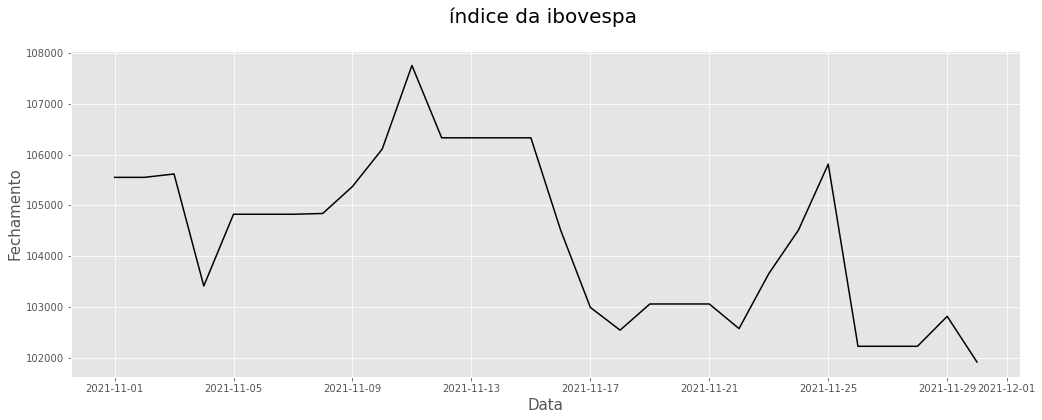

In [59]:
titulo = 'índice da ibovespa '


plt.figure(figsize=(17, 6))
plt.style.use('ggplot')
plt.plot(df_completo['Data'], df_completo['Fechamento'] , color='k')
plt.xlabel('Data', fontsize=15)
plt.ylabel('Fechamento', fontsize=15)
plt.title(f'{titulo}\n', fontsize=20)


plt.show()
